## Зчитування даних з файлу

In [1]:
import matplotlib.pyplot as plt
import numpy as np
with open('f15.txt') as data:
    f = []
    for i, j in enumerate(data.read().split()):
        f.append(j)
        

frounded = []
for i, j in enumerate(f):
    j = np.around(float(j), 4)
    frounded.append(j)
frounded = np.array(frounded)
# print data
def show_f():
    print('File Data:')
    for i in range(5):
        print(str(i) + ')', frounded[i])
    print("...")
show_f()

File Data:
0) -10.0
1) 0.9757
2) -1.5496
3) -12.8246
4) -16.7176
...


## Побудова Графіка "Аналогові сигнали"

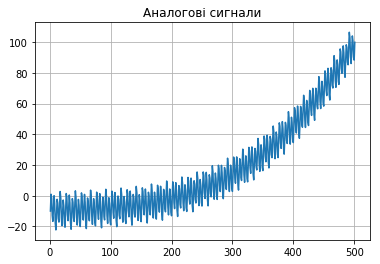

In [2]:
# show analog signals
def show_as():
    y = np.arange(1, 502)
    plt.plot(y, frounded)
    plt.title('Аналогові сигнали')
    plt.grid()
    plt.show()
show_as()

## Виконання перетворення і побудова графіка "Вихідні сигнали"

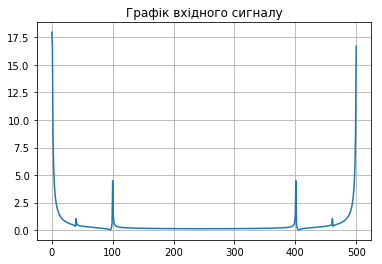

In [3]:
def FT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    M = M / len(frounded)
    return np.dot(M, x)

ft = FT(frounded)
ft = np.abs(ft)



def show_ft():
    y = np.arange(1, 502)
    plt.plot(ft)
    plt.title('Графік вхідного сигналу')
    plt.grid()
    plt.show()
show_ft()

## Знаходження частот

In [80]:
freq = []
T = 1.0 / 100.0
for i, j in enumerate(range(len(ft/2) - 1)):
    if ft[i-1] < ft[i] and ft[i+1] < ft[i]:
        freq.append((j - 1) * T)
freq = np.delete(freq, 0)
freq = np.around(freq, 1)
print('\nЧастоти(f*):')
for i, j in enumerate(freq):
    print(str(i+1) + ')', j)


Частоти(f*):
1) 0.4
2) 1.0
3) 4.0
4) 4.6


## Створення Матриці

In [135]:
import math

funcs = [None] * 8
funcs[0] = lambda i: pow(i, 3)
funcs[1] = lambda i: pow(i, 2)
funcs[2] = lambda i: i
funcs[3] = lambda i: math.sin(freq[0] * 2 * np.pi * i)
funcs[4] = lambda i: math.sin(freq[1] * 2 * np.pi * i)
funcs[5] = lambda i: math.sin(freq[2] * 2 * np.pi * i)
funcs[6] = lambda i: math.sin(freq[3] * 2 * np.pi * i)
funcs[7] = lambda i: 1

matrix = np.array([[0,0,0,0,0,0,0,0]])

for i in range(8):
    l = [None] * 8
    for j in range(8):
        val = 0
        for k in range(500):
            k /= 100 
            val += funcs[i](k) * funcs[j](k) / 2
        l[j] = val
    matrix = np.append(matrix, [l], axis= 0)
        
matrix = matrix[1:,:]
print(matrix)

[[ 5.54137277e+05  1.29428385e+05  3.10939583e+04 -2.39217817e+03
  -9.88343961e+02 -2.47274736e+02 -2.14673558e+02  7.78128125e+03]
 [ 1.29428385e+05  3.10939583e+04  7.78128125e+03 -4.97333017e+02
  -1.98878225e+02 -4.94738443e+01 -4.29471365e+01  2.07708750e+03]
 [ 3.10939583e+04  7.78128125e+03  2.07708750e+03 -9.94666034e+01
  -3.97756449e+01 -9.89476886e+00 -8.58942731e+00  6.23750000e+02]
 [-2.39217817e+03 -4.97333017e+02 -9.94666034e+01  1.25000000e+02
   5.43467181e-15 -4.37583997e-16 -1.61992815e-14  1.73992765e-15]
 [-9.88343961e+02 -1.98878225e+02 -3.97756449e+01  5.43467181e-15
   1.25000000e+02  1.67912559e-14  3.32997518e-14  1.38916656e-14]
 [-2.47274736e+02 -4.94738443e+01 -9.89476886e+00 -4.37583997e-16
   1.67912559e-14  1.25000000e+02 -1.24726618e-13 -4.84334794e-15]
 [-2.14673558e+02 -4.29471365e+01 -8.58942731e+00 -1.61992815e-14
   3.32997518e-14 -1.24726618e-13  1.25000000e+02 -3.95794508e-14]
 [ 7.78128125e+03  2.07708750e+03  6.23750000e+02  1.73992765e-15
   

## Створення вектора

In [145]:
vector = []

for i in range(8):
    val = 0
    for k in range(500):
        j = k / 100 
        val += funcs[i](j) * frounded[k] / 2
    vector.append(val)

vector = np.array(vector)
print(vector)

[ 4.08288796e+05  9.29670662e+04  2.11975425e+04 -2.09377842e+03
 -8.69017978e+02 -2.17589734e+02 -1.88905308e+02  4.45169380e+03]


## Розв`язок системи алгебраїчних рівнянь

In [146]:
a = np.linalg.solve(matrix, vector)
print(a)

[ 0.91485772 -0.3633426   0.62698862 -0.18890883 -0.09716746 -0.02512465
 -0.02182878 -9.21384472]


## Функціонал похибки

In [147]:
functional_error = 0
for i in range(500):
    j = i / 100
    sum_in_formula = 0
    for k in range(4):
        sum_in_formula += a[k + 3] * math.sin(freq[k] * 2 * np.pi * i)
    functional_error += pow(a[0]*pow(j,3) + a[1]*pow(j,2) + a[2] * j + sum_in_formula + a[7] - frounded[i], 2) / 2
    
print(functional_error)

13624.094362817244


## Математична модель

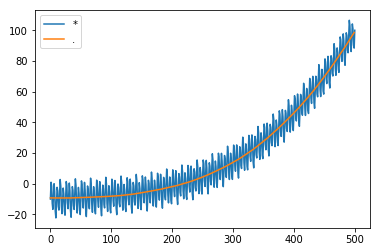

In [148]:
mat_model = []
for i in range(500):
    j = i / 100
    val = 0
    sum_in_formula = 0
    for k in range(4):
        sum_in_formula += a[k + 3] * math.sin(freq[k] * 2 * np.pi * j)
    val += a[0]*pow(j,3) + a[1]*pow(j,2) + a[2] * j + sum_in_formula + a[7]
    mat_model.append(val) 

plt.plot(frounded, label='*')
plt.plot(mat_model, label='.')
plt.legend(loc='best')
plt.show()